In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\rinkeby1.csv", delimiter = ",")
df1 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\rinkeby2.csv", delimiter = ",")
df2 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\rinkeby3.csv", delimiter = ",")
df3 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\rinkeby4.csv", delimiter = ",")
df4 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\rinkeby5.csv", delimiter = ",")
df5 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\rinkeby6.csv", delimiter = ",")
df6 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\rinkeby7.csv", delimiter = ",")
df7 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\rinkeby8.csv", delimiter = ",")
df8 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\rinkeby9.csv", delimiter = ",")
df9 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\rinkeby10.csv", delimiter = ",")

In [3]:
dfinal = [df0,df1,df2,df3,df4,df5,df6,df7,df8,df9]
result = pd.concat(dfinal)
result.shape

(421, 10)

In [4]:
def get_index(ans):
    i = 0;
    while(ans[i]!= " "):
        i+=1;
    return i

def convertStr(ans):
    space = get_index(ans)
    time  = int(ans[:space])
    if(ans[space+1] == "m"):
        time *= 60
    elif (ans[space+1] == "h"):
        time = time*60*60
    return time


In [5]:

arr = []
for i in range(0,result.shape[0]):
    arr.append( convertStr(result['timestamp'].iloc[i]))

In [6]:
 result["time_in_seconds"] = arr

In [7]:
def convertBlcks(ans):
    time  = int(ans[:2])
    return time


arr_new = []
for i in range(0,result.shape[0]):
    arr_new.append( convertStr(result['block_confirmations'].iloc[i]))

In [8]:
result["blockss"] = arr_new

###  Calculation for 7 block confirmation time

In [9]:
arr_avg = []
for i in range(0,result.shape[0]):
    time = result["time_in_seconds"].iloc[i]
    blocks = result["blockss"].iloc[i]
    arr_avg.append(7*time/blocks)
result["time_per_7blocks"] = arr_avg




In [10]:
result["time_per_7blocks"].describe()


count    421.000000
mean     103.899296
std       31.025968
min       52.500000
25%       84.000000
50%      101.500000
75%      120.000000
max      210.000000
Name: time_per_7blocks, dtype: float64

Text(0, 0.5, 'Number of Transactions')

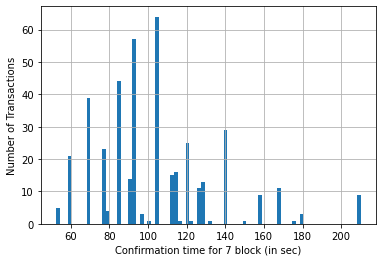

In [30]:
graph1 = result["time_per_7blocks"].hist(bins = 80) 
graph1.set_xlabel("Confirmation time for 7 block (in sec)")
graph1.set_ylabel("Number of Transactions")

### Calculations for 12 block confirmation time

In [12]:
arr_avg12 = []
for i in range(0,result.shape[0]):
    time = result["time_in_seconds"].iloc[i]
    blocks = result["blockss"].iloc[i]
    arr_avg12.append(12*time/blocks)
result["time_per_12_blocks"] = arr_avg12

In [13]:
result["time_per_12_blocks"].describe()


count    421.000000
mean     178.113079
std       53.187375
min       90.000000
25%      144.000000
50%      174.000000
75%      205.714286
max      360.000000
Name: time_per_12_blocks, dtype: float64

Text(0, 0.5, 'Number of Transactions')

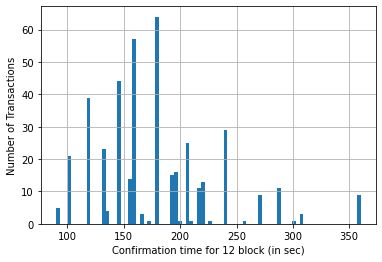

In [29]:
graph  = result["time_per_12_blocks"].hist(bins=80)
graph.set_xlabel("Confirmation time for 12 block (in sec)")
graph.set_ylabel("Number of Transactions")